In [1]:
fig_dir = "../../figures"
fig_ext = "pdf"

In [7]:
import matplotlib.pyplot as plt
import thesis
import numpy as np

In [8]:
import pycbc.waveform

In [9]:
waveform = pycbc.waveform.get_td_waveform(approximant="IMRPhenomPv2", delta_t = 0.0001, mass1=30, mass2=30, f_lower=30)

In [10]:
waveform[0].sample_times

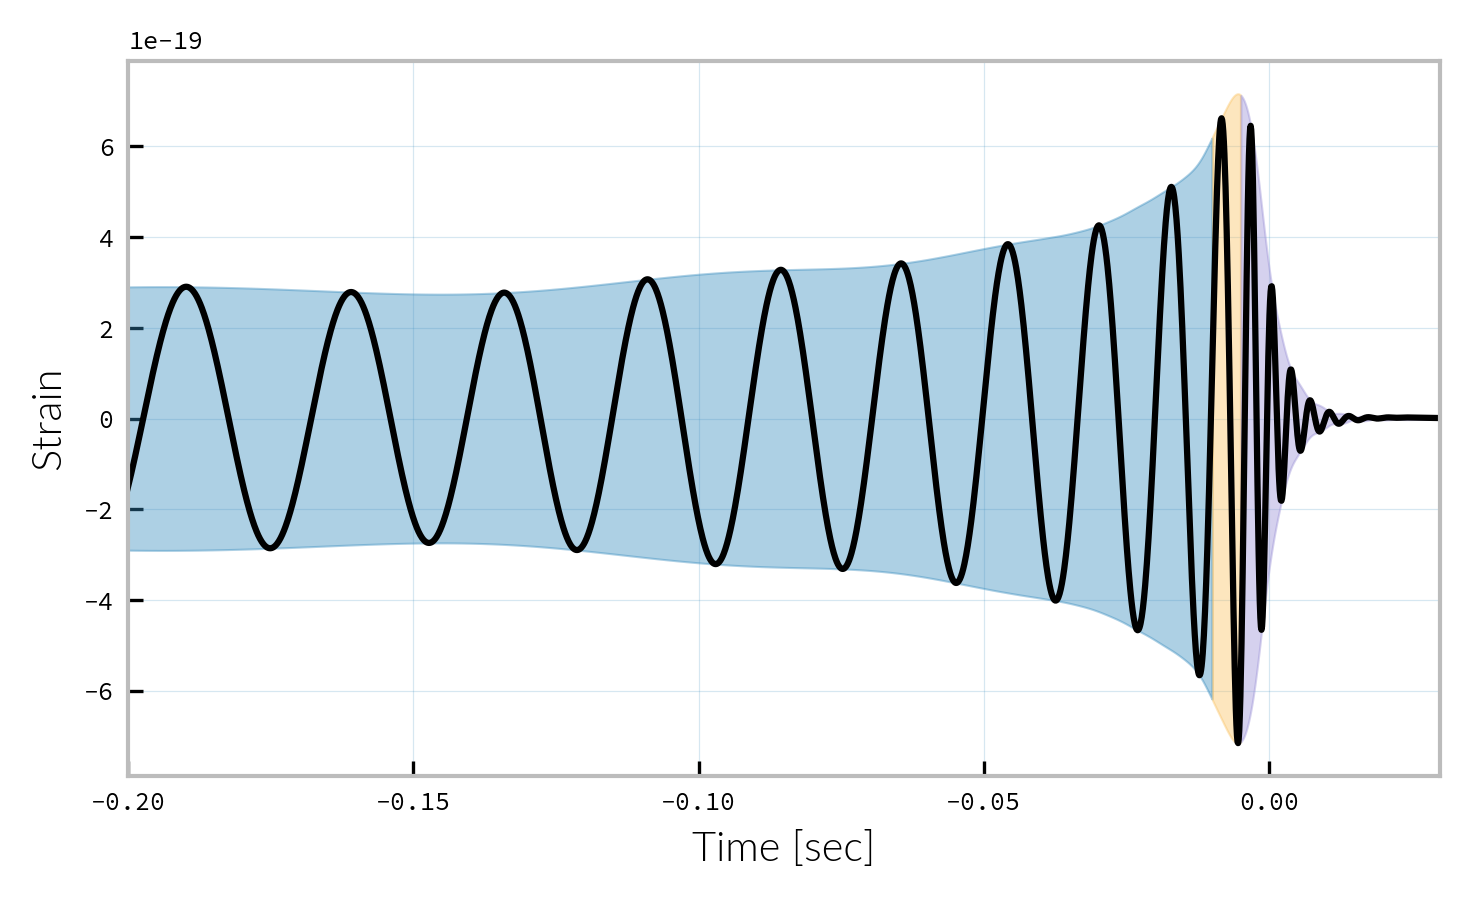

In [13]:
f, ax = plt.subplots(1,1, dpi=300)
ax.set_xlim([-.2, .03])
hrss = np.sqrt(waveform[0].data**2 + waveform[1].data**2)
inspiral = (-.2 <  waveform[0].sample_times) & (waveform[0].sample_times < -0.01)
merger = (-.01 <  waveform[0].sample_times) & (waveform[0].sample_times < -0.005)
ringdown = (-.005 <  waveform[0].sample_times) & (waveform[0].sample_times < 2)
ax.fill_between(waveform[0].sample_times[inspiral], -hrss[inspiral], hrss[inspiral], alpha=0.4, color=thesis.colors['blue'])
ax.fill_between(waveform[0].sample_times[merger], -hrss[merger], hrss[merger], alpha=0.4, color=thesis.colors['yellow'])
ax.fill_between(waveform[0].sample_times[ringdown], -hrss[ringdown], hrss[ringdown], alpha=0.4, color=thesis.colors['purple'])


ax.plot(waveform[0].sample_times, waveform[0].data, color='k')

ax.set_xlabel("Time [sec]")
ax.set_ylabel("Strain")
f = thesis.thesisify(f)


f.savefig("{}/sources/bbh-cartoon.{}".format(fig_dir, fig_ext))